<a href="https://colab.research.google.com/github/marianamartiyns/RFM_Cluster_Analysis/blob/main/RFM_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Driven Sales & Customer Analysis
Data To Insights


# 🧩 Libraries

In [2]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=30d1e3ccaa342b9b08e0f47f640305e6dd02f21825b038af476fbe486aa6f6cf
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from ydata_profiling import ProfileReport

# 🗂️ Database

A tabela contém informações de compras de um e-commerce em 37 países. Contém a identificação do cliente e os dados da compra.

```
CustomerID: Código de identificação do cliente
Description: Descrição do produto
InvoiceNo: Código da fatura
StockCode: Código de estoque do produto
Quantity: Quantidade do produto
InvoiceDate: Data do faturamento (compra)
UnitPrice: Preço unitário do produto
Country: País da compra
```



In [5]:
df = pd.read_csv('/content/sample_data/data.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 🛠️ Data Cleaning

### Tratamento de Dados Nulos (4.0%)

In [8]:
df_nan = (
  df.isna().sum().to_frame("Missing_Values") # quant. de valores nulos por coluna
  .join((df.isna().sum() / df.shape[0] * 100).to_frame("Missing_Perc")) # % de valores nulos por coluna
  .sort_values("Missing_Values", ascending=False)
)

df_nan.style.format('{:.4%}', subset=['Missing_Perc'])

,Missing_Values,Missing_Perc
CustomerID,135080,2492.6694%
Description,1454,26.8311%
InvoiceNo,0,0.0000%
StockCode,0,0.0000%
Quantity,0,0.0000%
InvoiceDate,0,0.0000%
UnitPrice,0,0.0000%
Country,0,0.0000%


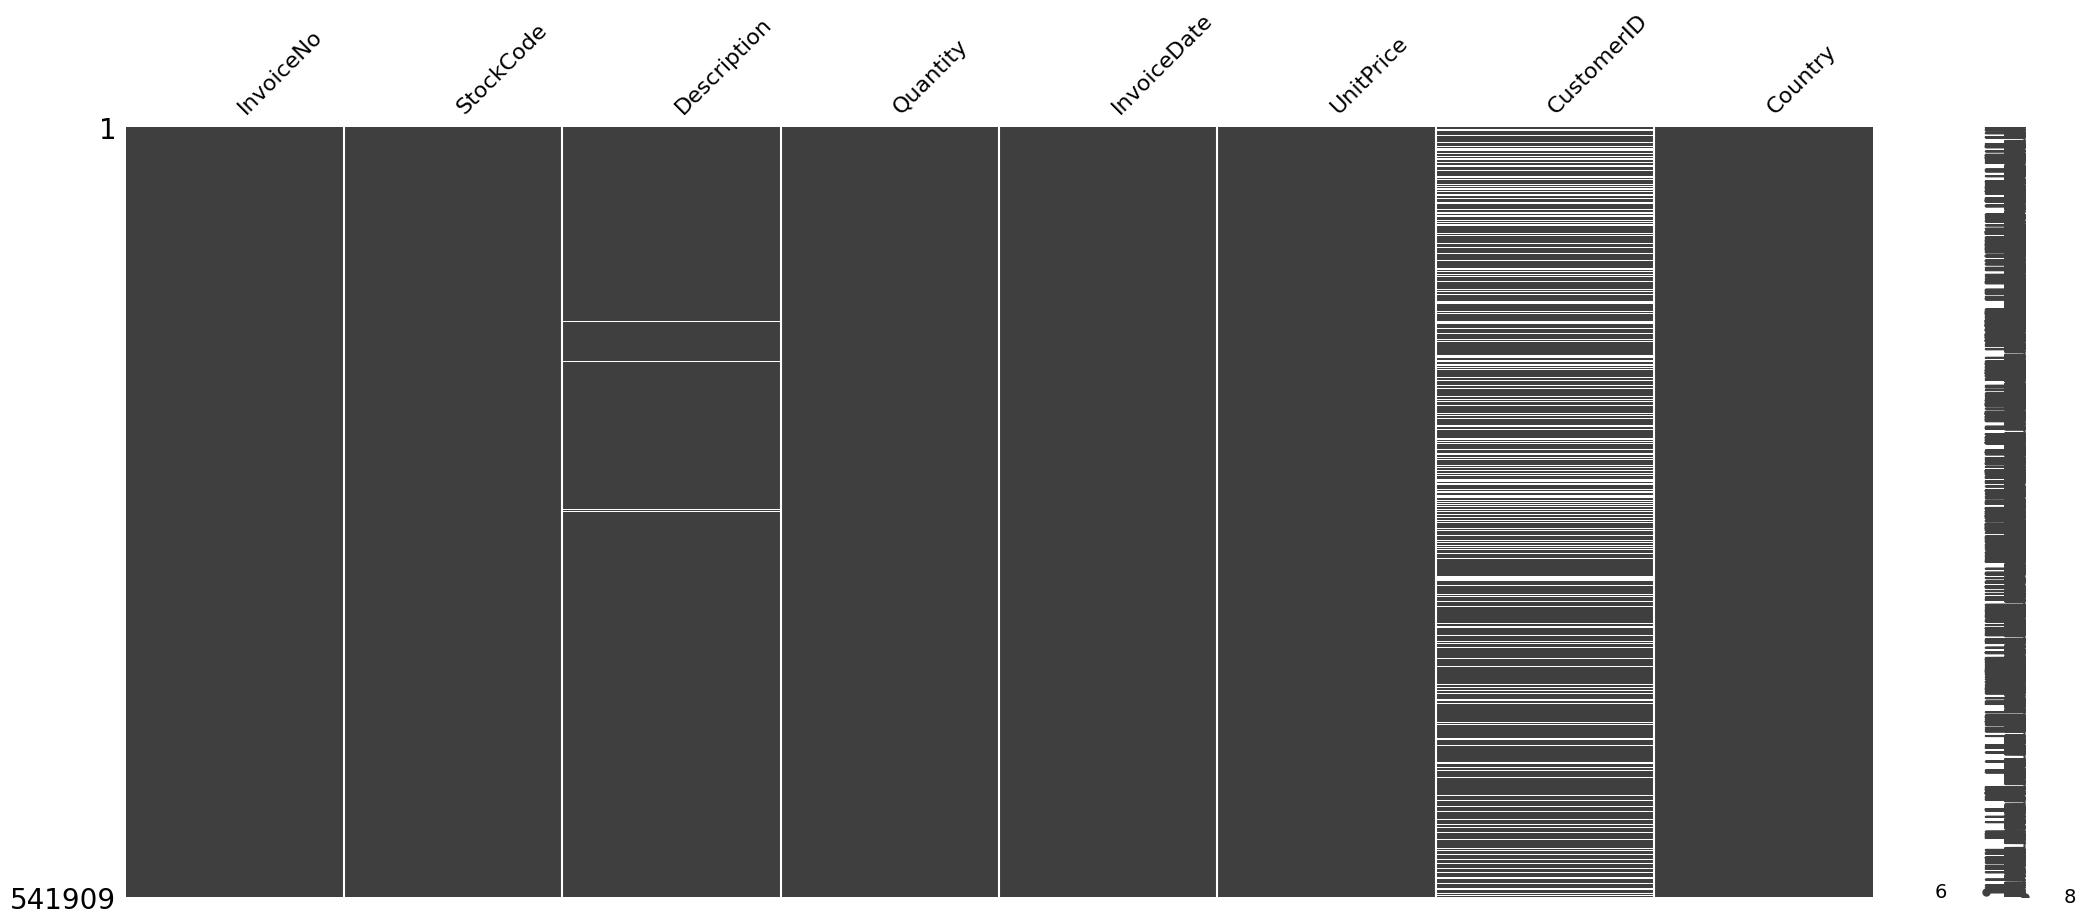

In [9]:
# Visualizando esses valores faltantes
msno.matrix(df);

In [10]:
# Removendo as linhas sem CustomerID(58020) descrição da compra(792), sem preço unitário(1) e sem país(1)
df.dropna(subset=['CustomerID'], inplace=True)
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['UnitPrice'], inplace=True)
df.dropna(subset=['Country'], inplace=True)

In [11]:
df_nan = (
  df.isna().sum().to_frame("Missing_Values") # quant. de valores nulos por coluna
  .join((df.isna().sum() / df.shape[0] * 100).to_frame("Missing_Perc")) # % de valores nulos por coluna
  .sort_values("Missing_Values", ascending=False)
)

df_nan.style.format('{:.4%}', subset=['Missing_Perc'])

,Missing_Values,Missing_Perc
InvoiceNo,0,0.0000%
StockCode,0,0.0000%
Description,0,0.0000%
Quantity,0,0.0000%
InvoiceDate,0,0.0000%
UnitPrice,0,0.0000%
CustomerID,0,0.0000%
Country,0,0.0000%


### Colunas numéricas com valores iguais ou inferior a 0
'Preços unitários' e 'quantidade de produtos'

In [12]:
# Verificando colunas numéricas com valores <= 0
cols_numeric = ['UnitPrice', 'Quantity']
for col in cols_numeric:
    count_negatives = (df[col] < 0).sum()
    count_zeros = (df[col] == 0).sum()
    print(f"\nColuna '{col}':")
    print(f"  Valores menores que zero: {count_negatives}")
    print(f"  Valores iguais a zero: {count_zeros}")


Coluna 'UnitPrice':
  Valores menores que zero: 0
  Valores iguais a zero: 40

Coluna 'Quantity':
  Valores menores que zero: 8905
  Valores iguais a zero: 0


Por termos um dataset de compras, não faz sentido termos preços e quantidades menor que zero. Por isso vamos filtrar esses dados e trabalhar apenas com valores positivos.

In [13]:
df_filtered = df.copy()
for col in cols_numeric:
    df_filtered = df_filtered[df_filtered[col] > 0]

In [14]:
# Verificando o novo dataset
for col in cols_numeric:
    count_negatives = (df_filtered[col] < 0).sum()
    count_zeros = (df_filtered[col] == 0).sum()
    print(f"\nColuna '{col}':")
    print(f"  Valores menores que zero: {count_negatives}")
    print(f"  Valores iguais a zero: {count_zeros}")


Coluna 'UnitPrice':
  Valores menores que zero: 0
  Valores iguais a zero: 0

Coluna 'Quantity':
  Valores menores que zero: 0
  Valores iguais a zero: 0


### Linhas duplicadas (0.8%)
Removeremos as linhas duplicadas pois não faz sentido uma mesma compra para o mesmo cliente no mesmo horário, com mesmos valores etc

In [15]:
print(f'Quantidade de linhas duplicadas: {df_filtered.duplicated(keep=False).sum()}')

Quantidade de linhas duplicadas: 10001


In [16]:
# Quantidade de linhas duplicadas de cada entrada (duplicated)
(
  df_filtered
  .groupby(df_filtered.columns.tolist())
  .size()
  .to_frame('duplicated')
  .query('duplicated > 1')
  .sort_values('duplicated', ascending=False)
)

duplicated
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                   
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom          20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom          12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom           8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom           6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom           6
...                                                                                                                           ...
556280    22500     SET OF 2 TINS JARDIN DE PROVENCE    1        6/9/2011 20:03   4.95      14584.0    United Kingdom           2
          22497     SET OF 2 TINS VINTAGE BATHROOM      1        6/9/2011 20:03   4.25      14584.0    United Kingdom           2
556263    23242     TREASURE TIN BUFFALO BILL           1        6/9/2011 18:41   2.08      13969.0    United Kingdom           2
556252    84970S    HANGING HEART ZINC T-LIGHT HOLDER   12       6/9/2011 16:44   0.85      16779.0    United Kingdom           2
581538    23343     JUMBO BAG VINTAGE CHRISTMAS         1        12/9/2011 11:34  2.08      14446.0    United Kingdom           2

[4809 rows x 1 columns]

In [17]:
df_filtered.drop_duplicates(inplace=True) # excluindo essas linhas

### Corrigindo os tipos de dados

In [18]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [19]:
# alterando 'InvoiceDate' para o tipo datetime e 'CustomerID' para nº inteiro
df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])
df_filtered['CustomerID'] = df_filtered['CustomerID'].astype(int)

In [20]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


### Tratando os outliers

Vamos considerar estes valores como erro, removendo os outliers extremos em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.

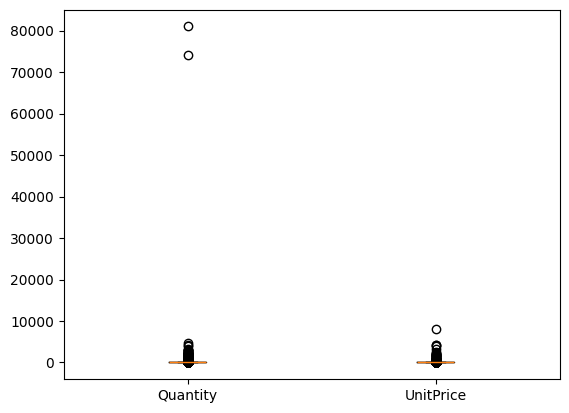

In [21]:
# visualizando os outliers

columns = ['Quantity', 'UnitPrice']
plt.boxplot((df_filtered[columns]), tick_labels=columns);

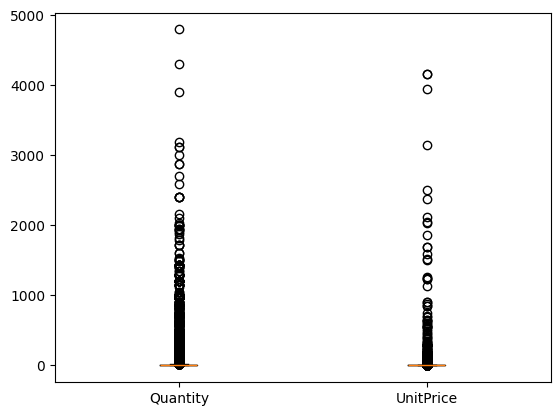

In [22]:
df_filtered = df_filtered[(df_filtered['Quantity'] <= 10000) & (df_filtered['UnitPrice'] <= 5000)]

# Plotando após o ajuste
columns = ['Quantity', 'UnitPrice']
plt.boxplot((df_filtered[columns]), tick_labels=columns);

### Adicionando a coluna ´TotalPrice'

In [23]:
df_filtered['TotalPrice'] = df_filtered['Quantity'] * df_filtered['UnitPrice']
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# 📝 Análise de comportamento do cliente e vendas



#### Top 10 países com maior valor em vendas

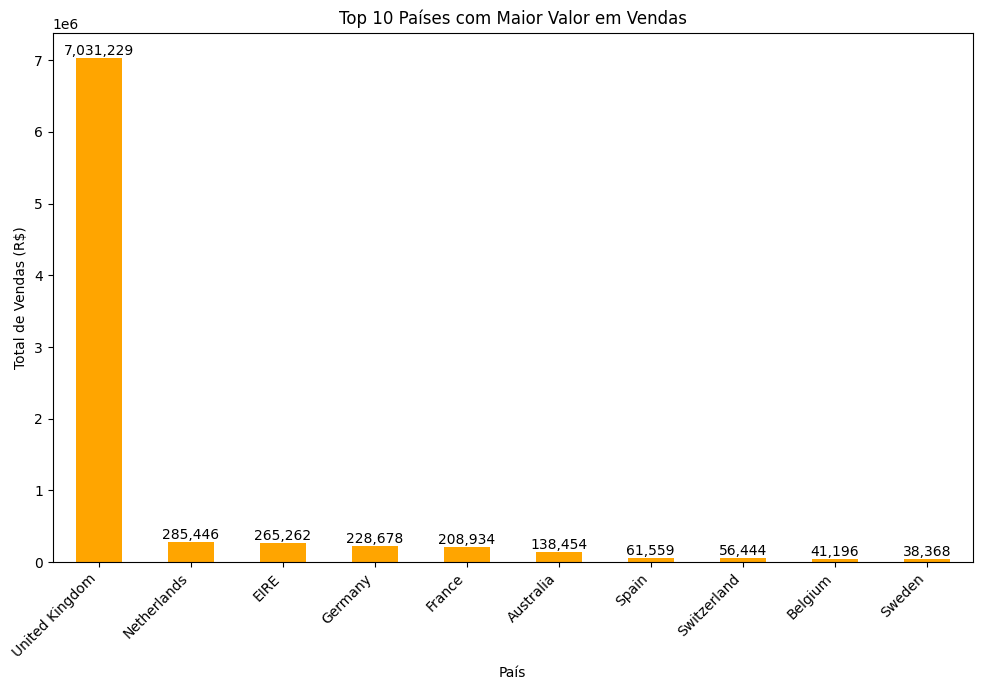

In [24]:
# Agrupar os dados por 'Country' e somar os valores de 'TotalPrice'
top_countries = df_filtered.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plotar o gráfico
plt.figure(figsize=(10, 7))
ax = top_countries.plot(kind='bar', color='orange')

for i, value in enumerate(top_countries):
    ax.text(i, value + 50, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### Top 10 produtos mais vendidos




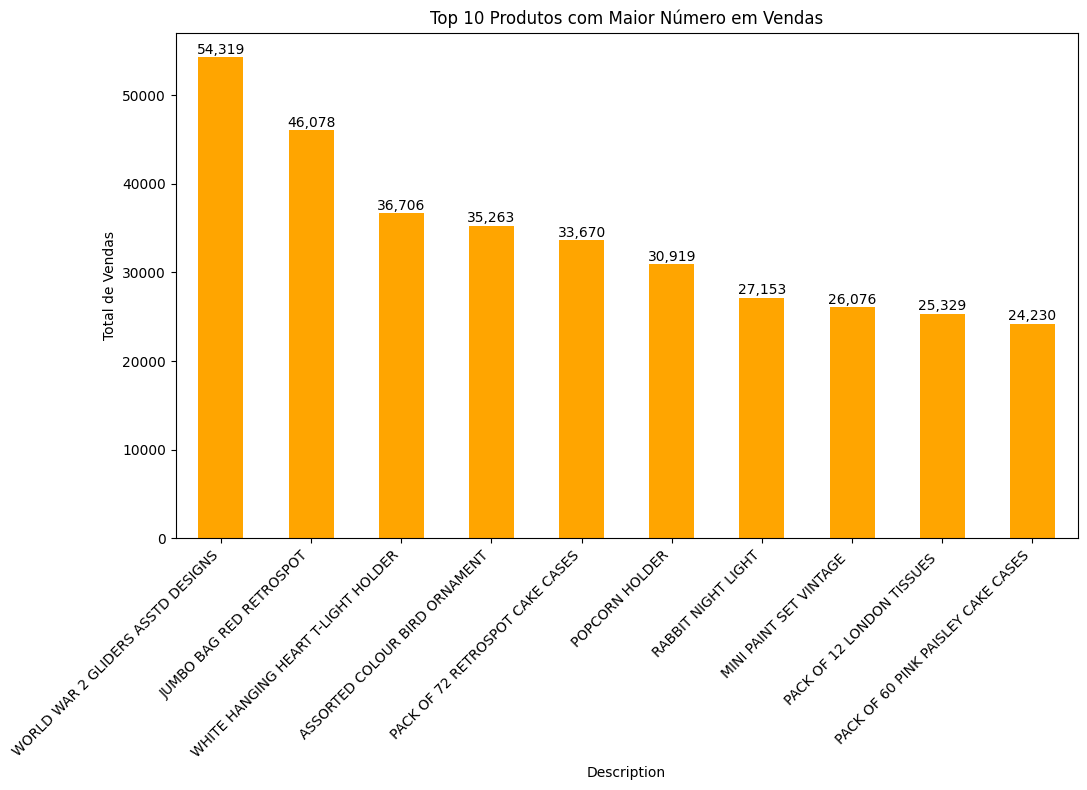

In [25]:
# Agrupar os dados por 'Description' e somar os valores de 'Quantity'
top_products = df_filtered.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotar o gráfico
plt.figure(figsize=(11, 8))
ax = top_products.plot(kind='bar', color='orange')

for i, value in enumerate(top_products):
    ax.text(i, value + 40, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Produtos com Maior Número em Vendas')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### Valor de venda total por mês




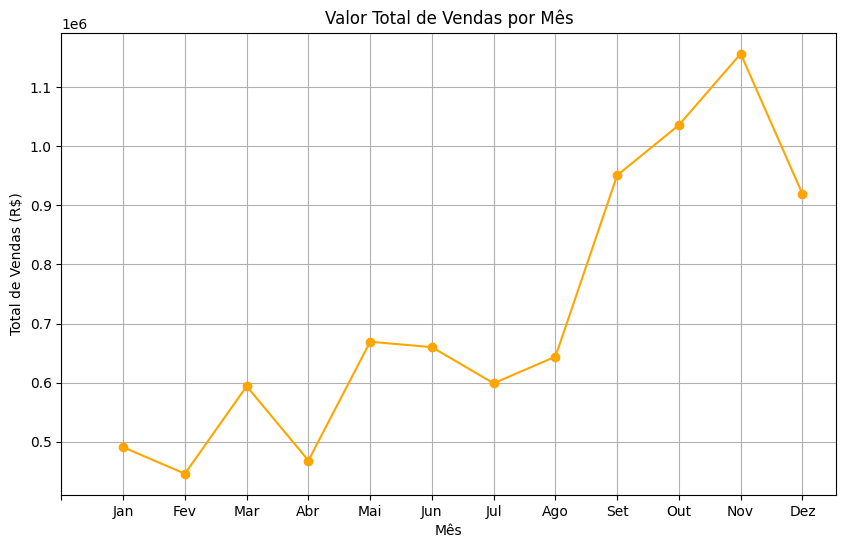

In [26]:
# Separando o Mês
df_filtered['Mes'] = df_filtered['InvoiceDate'].dt.month
monthly_sales = df_filtered.groupby('Mes')['TotalPrice'].sum()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Valor Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(ticks=range(13), labels=[' ', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
plt.grid(True)

#### Número de clientes únicos por mês

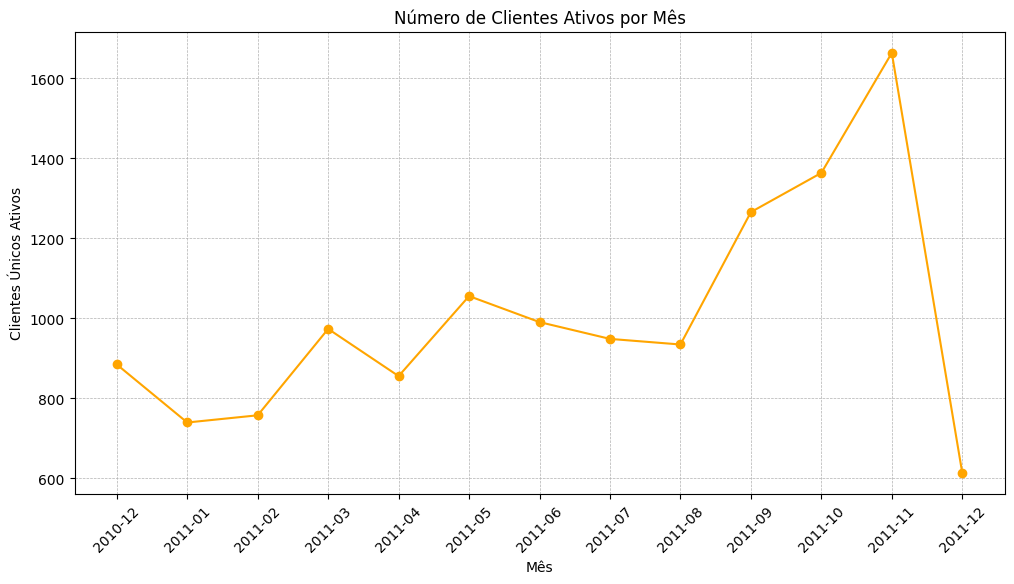

In [27]:
df_filtered["Month"] = df_filtered["InvoiceDate"].dt.to_period("M")
clientes_ativos = df_filtered.groupby("Month")["CustomerID"].nunique()

plt.figure(figsize=(12, 6))
plt.plot(clientes_ativos.index.astype(str), clientes_ativos.values, marker="o", linestyle="-", color="orange")
plt.xlabel("Mês")
plt.ylabel("Clientes Únicos Ativos")
plt.title("Número de Clientes Ativos por Mês")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

#### Valor de venda total por mês e por país (top 10)




In [28]:
import plotly.express as px

filtered_df = df_filtered[df_filtered['Country'].isin(top_countries.index)] # top_countries foi definido no 1º grafico
monthly_country_sales = filtered_df.groupby(['Mes', 'Country'])['TotalPrice'].sum().reset_index()

# gráfico interativo
fig = px.line(monthly_country_sales, x='Mes', y='TotalPrice', color='Country',
              title='Valor Total de Vendas por Mês e País (Top 10 países)',
              labels={'TotalPrice': 'Total de Vendas (R$)', 'Mes': 'Mês'})
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

#### Cálculo do RFM

Indicadores de recência, frequência e ticket médio (RFM) dos clientes.

A saber RFM:

- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente

In [30]:
# Última data de compra para o RFM
last_date = df_filtered['InvoiceDate'].max()
last_date

Timestamp('2011-12-09 12:50:00')

In [31]:
# Agrupando por cliente e pedido/compra
grouped = df_filtered.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',
    'TotalPrice': 'sum'
}).reset_index()

# Agrupando novamente por cliente para calcular RFM
rfm = grouped.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,  # Recência
    'InvoiceNo': 'count',  # Frequência
    'TotalPrice': 'mean'   # Ticket médio (Monetário)
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
...,...,...,...,...
4332,18280,277,1,180.600000
4333,18281,180,1,80.820000
4334,18282,7,2,89.025000
4335,18283,3,16,127.845625


#### Análise de churn (clientes que potencialmente pararam de comprar)

O churn acontece quando um cliente para de comprar por um determinado período. Por exemplo, se um cliente não faz compras há 30 dias, podemos considerá-lo como churn.

In [32]:
# Clientes com recência maior que 30 dias e frequência abaixo de 2 podem estar em risco de churn
rfm['Churn'] = np.where((rfm['Recency'] > 30) & (rfm['Frequency'] < 2), 1, 0) # 1 está em risco de churn, 0 se não.
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Churn
0,12347,1,7,615.714286,0
1,12348,74,4,449.310000,0
2,12349,18,1,1757.550000,0
3,12350,309,1,334.400000,1
4,12352,35,8,313.255000,0


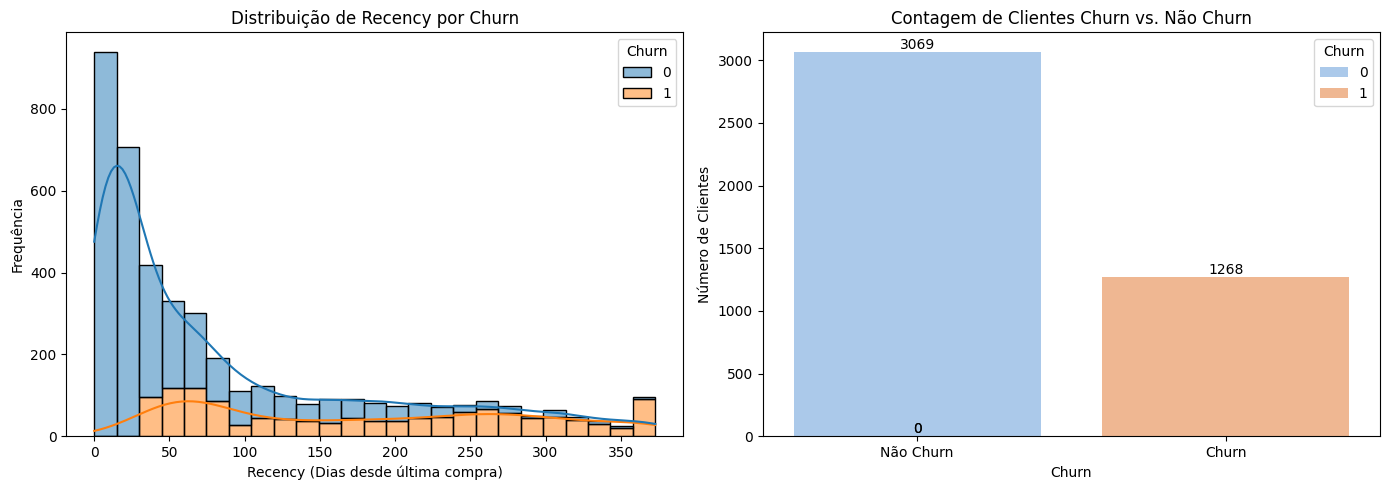

In [33]:
plt.figure(figsize=(14, 5))

# Gráfico 1: Distribuição de Recency por Churn
plt.subplot(1, 2, 1)
sns.histplot(data=rfm, x='Recency', hue='Churn', multiple="stack", kde=True)
plt.title('Distribuição de Recency por Churn')
plt.xlabel('Recency (Dias desde última compra)')
plt.ylabel('Frequência')

# Gráfico 2: Contagem de Clientes Churn vs. Não Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=rfm['Churn'], hue=rfm['Churn'], palette='pastel')
plt.title('Contagem de Clientes Churn vs. Não Churn')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.ylabel('Número de Clientes')
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# 📈 Clusterização dos clientes


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [35]:
# Normalizando as variáveis
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convertendo para DataFrame novamente, com os nomes das colunas
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

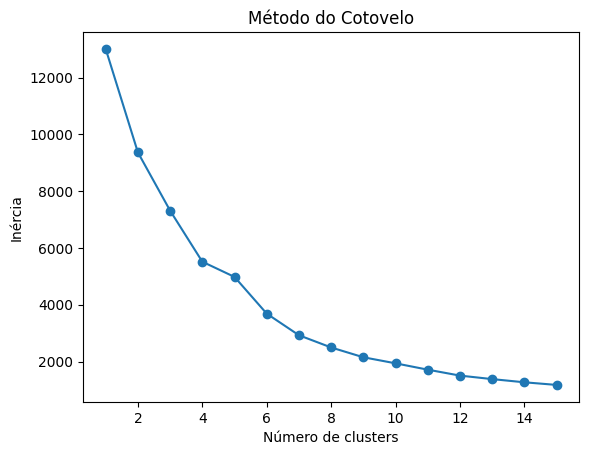

In [36]:
# Determinando o número de clusters com o método do cotovelo
inertia = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 16), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Churn,Cluster
0,12347,1,7,615.714286,0,0
1,12348,74,4,449.310000,0,0
2,12349,18,1,1757.550000,0,0
3,12350,309,1,334.400000,1,3
4,12352,35,8,313.255000,0,0


In [38]:
# Agrupando os dados por cluster e calculando as estatísticas
rfm.groupby("Cluster").agg(
    {
        "Recency": ["mean", "std"],
        "Frequency": ["mean", "std"],
        "Monetary": ["mean", "std"],
    }
)

Recency             Frequency                Monetary             
               mean        std       mean        std         mean          std
Cluster                                                                       
0         41.290343  35.919588   4.275558   3.977462   369.121867   289.616580
1          9.955882  44.897706  44.764706  34.484744   595.962568   618.150966
2         69.041667  72.586068  10.125000  15.445029  4910.363877  2948.330339
3        247.062852  66.432858   1.547842   1.068569   298.693253   269.986917

🔵 Cluster 0<br>
Recency: Média = 41 dias → Clientes relativamente recentes.<br>
Frequency: Média = 4.27 compras → Compram ocasionalmente.<br>
Monetary: Média = 369 → Gastam moderadamente.<br>
`Perfil: Clientes medianos, fazem compras de vez em quando e gastam um valor razoável.`
<br><br>

🟠 Cluster 1<br>
Recency: Média = 9.95 dias → Clientes muito recentes.<br>
Frequency: Média = 44.76 compras → Compram com muita frequência!<br>
Monetary: Média = 595.96 → Gastam bastante.<br>

`Perfil: Clientes VIP, compram frequentemente, gastam mais e são bem ativos.`
<br><br>

🟢 Cluster 2<br>
Recency: Média = 69 dias → Clientes menos recentes.<br>
Frequency: Média = 10 compras → Compram de forma esporádica.<br>
Monetary: Média = 4910.36 → Gastam muito alto!<br>

`Perfil: Clientes de alto valor, compram poucas vezes, mas gastam muito por compra.`
<br><br>

🔴 Cluster 3<br>
Recency: Média = 247 dias → Clientes muito antigos e inativos.<br>
Frequency: Média = 1.54 compras → Quase não compram.<br>
Monetary: Média = 298 → Gastam pouco.<br>
`Perfil: Clientes inativos/perdidos, compraram uma ou poucas vezes e não voltaram.`



### Visualização das Clusters - PCA (Análise de Componentes Principais)

O PCA reduz a dimensionalidade dos dados mantendo o máximo de informação possível para conseguimos visualizar.

In [39]:
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:,0]
rfm['PCA2'] = rfm_pca[:,1]

In [40]:
# Quais variáveis influenciam mais PCA1 e PCA2
pca_components = pd.DataFrame(pca.components_, columns=rfm_scaled.columns, index=['PCA1', 'PCA2'])
pca_components

,Recency,Frequency,Monetary
PCA1,-0.654379,0.682074,0.326440
PCA2,0.326455,-0.134570,0.935584


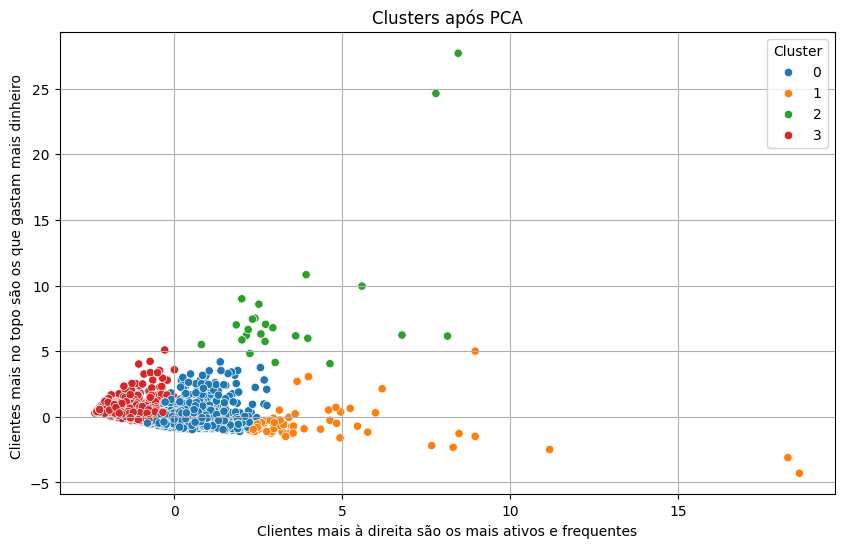

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='tab10')
plt.title('Clusters após PCA')
plt.xlabel('Clientes mais à direita são os mais ativos e frequentes')
plt.ylabel('Clientes mais no topo são os que gastam mais dinheiro ')
plt.grid(True)
plt.show()

In [42]:
# Mostrando a variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelo PCA1: {explained_variance[0]:.2%}")
print(f"Variância explicada pelo PCA2: {explained_variance[1]:.2%}")
print(f"Variância total explicada: {np.sum(explained_variance):.2%}") # PCA1 + PCA2 explicam > 70% da variância, então a projeção é representativa.

Variância explicada pelo PCA1: 43.19%
Variância explicada pelo PCA2: 32.32%
Variância total explicada: 75.51%


### Validação dos Resultados: Silhouette Score

[higher score (> 0.5) indicates a better clustering result.](https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a)

In [43]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5344
